## Loan Approval Prediction

### 1) Problem statement ###
*Design a machine learning model to predict loan approval status (Loan_Status) using demographic, financial, and property-related features to help banks streamline the loan approval process and reduce manual intervention.

### 2) Data Collection ###
* Dataset Source: 'data/loan_approval_dataset.csv'
* The data consists of 12 column and 1000 rows.

### 2.1 Import Data and Required Packages ###
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,2196,3326,253,36,1,Male,No,0,Graduate,Yes,Urban,Not Approved
1,15764,8460,252,120,1,Female,Yes,1,Graduate,Yes,Urban,Not Approved
2,19994,3671,146,60,0,Female,No,3+,Graduate,Yes,Semiurban,Approved
3,7370,1544,477,120,0,Female,Yes,0,Not Graduate,No,Urban,Not Approved
4,13064,3025,477,120,0,Female,No,0,Graduate,Yes,Semiurban,Approved


In [3]:
df.shape

(1000, 12)

### 2.2 Dataset information ###
* ApplicantIncome: 	Income of the primary applicant.
* CoapplicantIncome: Income of the co-applicant (if any).
* LoanAmount: Loan amount requested (in thousands).
* Loan_Amount_Term: Term of the loan in months.
* Credit_History: Whether the applicant has a good credit history (1 = Yes, 0 = No).
* Gender: Gender of the applicant.
* Married: Whether the applicant is married.
* Dependents: Number of dependents the applicant has.
* Education: Education level of the applicant.
* Self_Employed: Whether the applicant is self-employed.
* Property_Area: The type of area where the property is located.
* Loan_Status: Final loan decision (whether the loan is approved or not).

### 3. Data Checks to perform ###
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check data types ###

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicantIncome    1000 non-null   int64 
 1   CoapplicantIncome  1000 non-null   int64 
 2   LoanAmount         1000 non-null   int64 
 3   Loan_Amount_Term   1000 non-null   int64 
 4   Credit_History     1000 non-null   int64 
 5   Gender             1000 non-null   object
 6   Married            1000 non-null   object
 7   Dependents         1000 non-null   object
 8   Education          1000 non-null   object
 9   Self_Employed      1000 non-null   object
 10  Property_Area      1000 non-null   object
 11  Loan_Status        1000 non-null   object
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


### 3.2 Check Missing values ###

In [5]:
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

### 3.3 Check statistics of data set ###

In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,11254.596000,5161.281000,275.68500,134.424000,0.459000
std,5197.772287,2860.984079,131.93029,121.210231,0.498566
min,2008.000000,4.000000,51.00000,12.000000,0.000000
25%,6803.250000,2736.250000,162.00000,36.000000,0.000000
50%,11280.500000,5290.500000,279.00000,60.000000,0.000000
75%,16015.500000,7631.500000,388.25000,240.000000,1.000000
max,19994.000000,9992.000000,500.00000,360.000000,1.000000


In [6]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

### To identify Unique values is columns ###

In [7]:
col = df.select_dtypes('object').columns
for i in col:
    print('Unique values is columns "{}": {}'.format(i,df[i].nunique()))
    print('---------------------------------------------------------')
    print('Value counts: "{}" \n{}'.format(i,df[i].value_counts()))
    print('---------------------------------------------------------')

Unique values is columns "Gender": 2
---------------------------------------------------------
Value counts: "Gender" 
Gender
Female    516
Male      484
Name: count, dtype: int64
---------------------------------------------------------
Unique values is columns "Married": 2
---------------------------------------------------------
Value counts: "Married" 
Married
No     510
Yes    490
Name: count, dtype: int64
---------------------------------------------------------
Unique values is columns "Dependents": 4
---------------------------------------------------------
Value counts: "Dependents" 
Dependents
2     253
3+    252
0     248
1     247
Name: count, dtype: int64
---------------------------------------------------------
Unique values is columns "Education": 2
---------------------------------------------------------
Value counts: "Education" 
Education
Graduate        501
Not Graduate    499
Name: count, dtype: int64
---------------------------------------------------------
Unique

In [9]:
print("Categories in 'Education' variable: ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable: ",end=" ")
print(df['Self_Employed'].unique())

print("Categories in 'Property_Area' variable: ",end=" ")
print(df['Property_Area'].unique())

print("Categories in 'Loan_Status' variable: ",end=" ")
print(df['Loan_Status'].unique())

Categories in 'Education' variable:  ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:  ['Yes' 'No']
Categories in 'Property_Area' variable:  ['Urban' 'Semiurban' 'Rural']
Categories in 'Loan_Status' variable:  ['Not Approved' 'Approved']


In [11]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features: {}'.format(len(cat_feature), cat_feature))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
We have 7 categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [12]:
df.columns = df.columns.str.strip()

In [13]:
numerical_feture = df.select_dtypes(exclude='object').columns
categorical_feature = df.select_dtypes(include='object').columns

In [14]:
correlation_matrix = df[numerical_feture].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.012047,-0.013026,0.011475,0.023382
CoapplicantIncome,0.012047,1.000000,0.100720,0.021539,-0.022281
LoanAmount,-0.013026,0.100720,1.000000,0.034928,-0.021814
Loan_Amount_Term,0.011475,0.021539,0.034928,1.000000,0.030269
Credit_History,0.023382,-0.022281,-0.021814,0.030269,1.000000


<Axes: >

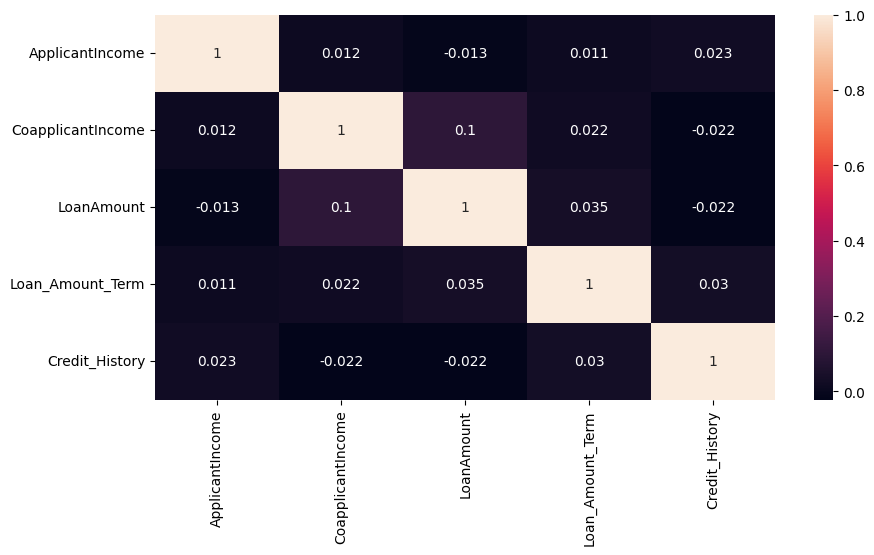

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True)

### Highest Correlation ###
* In the given correlation matrix, the highest off-diagonal correlation is between CoapplicantIncome and LoanAmount with a value of 0.101.

### Lowest Correlation: ###
* The lowest correlation (besides diagonal self-correlations) is between LoanAmount and ApplicantIncome at -0.013.

### Skewness ###

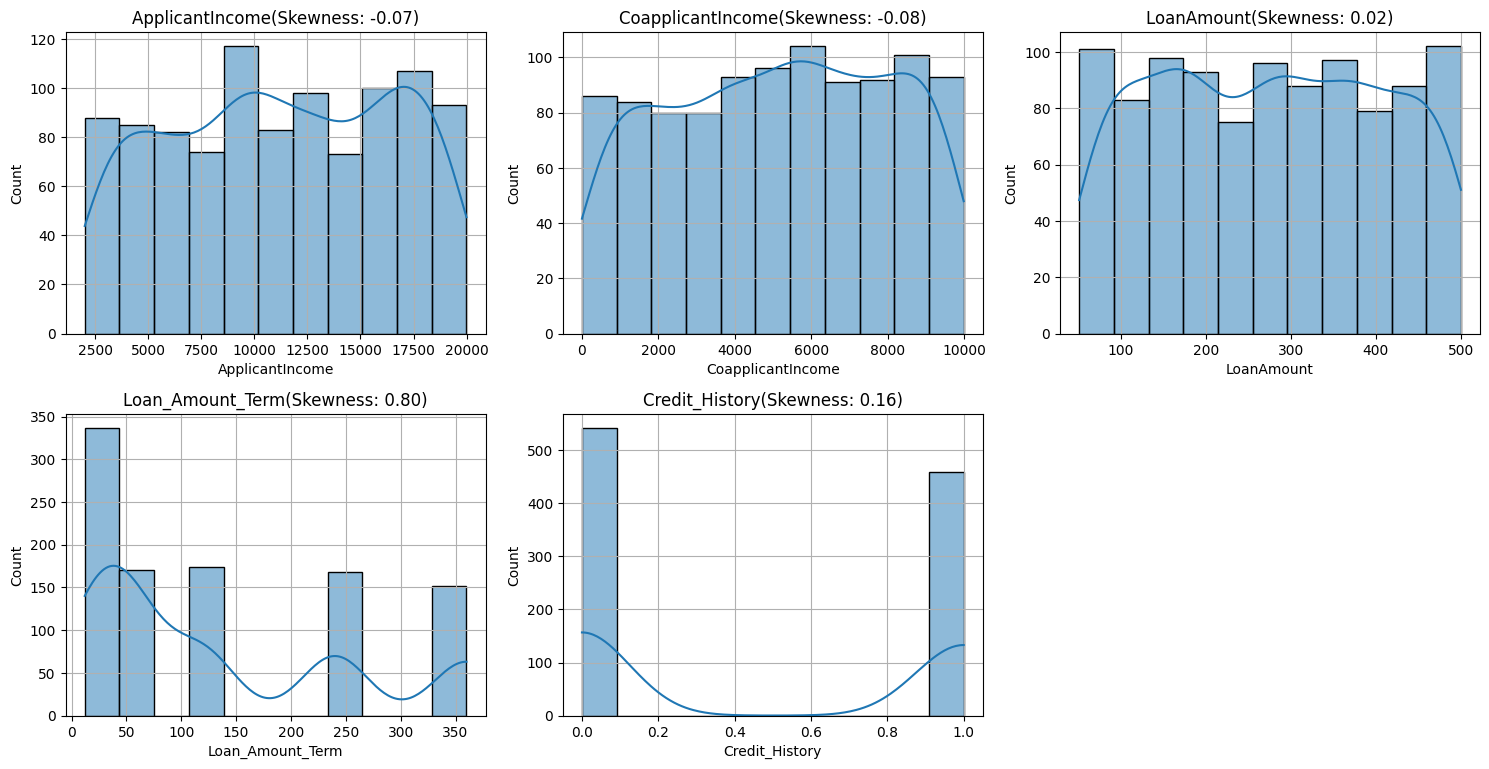

In [21]:
def plot_histogram(df, cols):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        skewness = df[column].skew()
        plt.grid(True)
        plt.title(f'{column}(Skewness: {skewness:.2f})')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histogram(df, numerical_feture)

### Calculating High Skewness ###

In [23]:
from scipy.stats import skew
skewness_threshold = 1.0

# Calculate skewness for each numeric column
skewness_values = df.apply(lambda x: skew(x) if pd.api.types.is_numeric_dtype(x) else None)

# Identify columns with high skewness
high_skew_columns = skewness_values[abs(skewness_values) >= skewness_threshold]

# Display the results
print("Skewness Values:")
print(skewness_values)

print("\nColumns with High Skewness:")

Skewness Values:
ApplicantIncome     -0.069434
CoapplicantIncome   -0.076671
LoanAmount           0.018092
Loan_Amount_Term     0.794190
Credit_History       0.164554
Gender                    NaN
Married                   NaN
Dependents                NaN
Education                 NaN
Self_Employed             NaN
Property_Area             NaN
Loan_Status               NaN
dtype: float64

Columns with High Skewness:


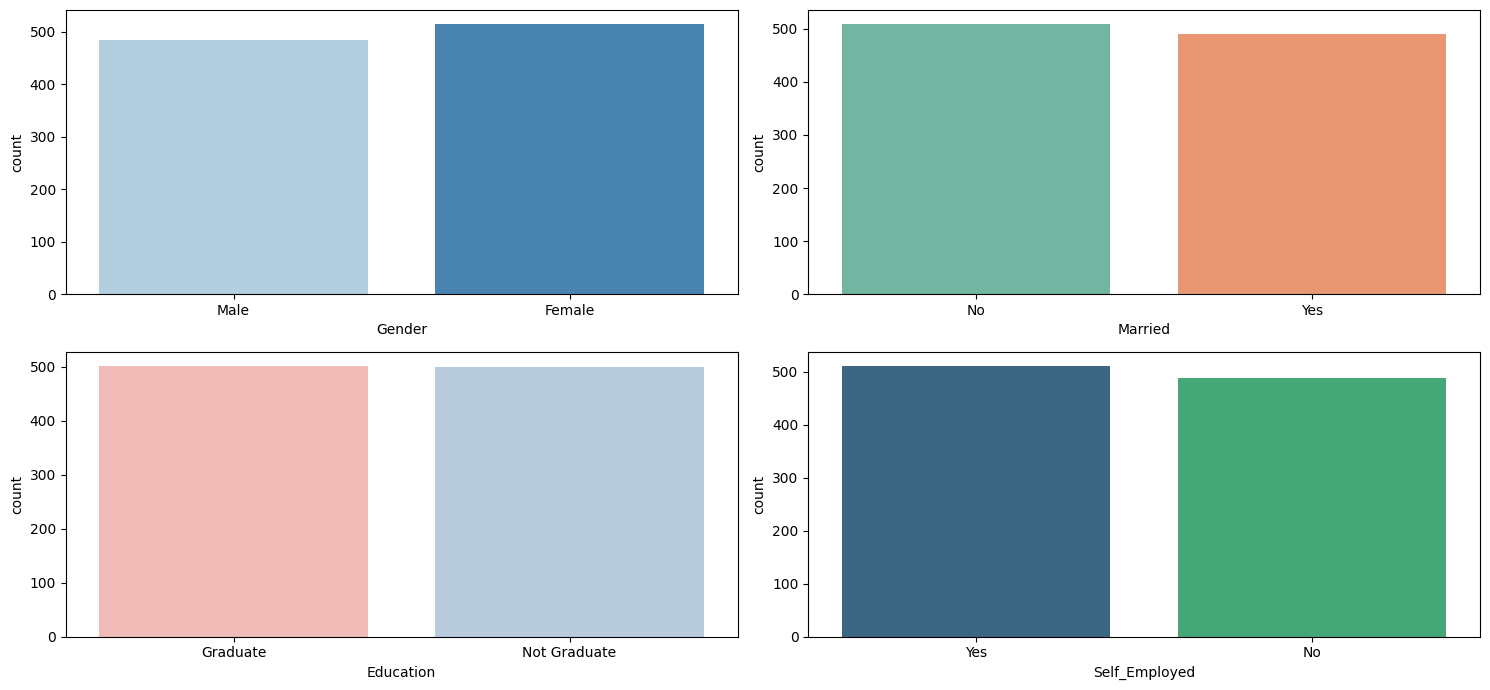

In [37]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

# First subplot
sns.countplot(x='Gender', data=df, ax=axes[0, 0], palette='Blues')

# Second subplot
sns.countplot(x='Married', data=df, ax=axes[0, 1], palette='Set2')

# Third subplot
sns.countplot(x='Education', data=df, ax=axes[1, 0], palette='Pastel1')

# Fourth subplot
sns.countplot(x='Self_Employed', data=df, ax=axes[1, 1], palette='viridis')

# Display the plots
plt.tight_layout()
plt.show()

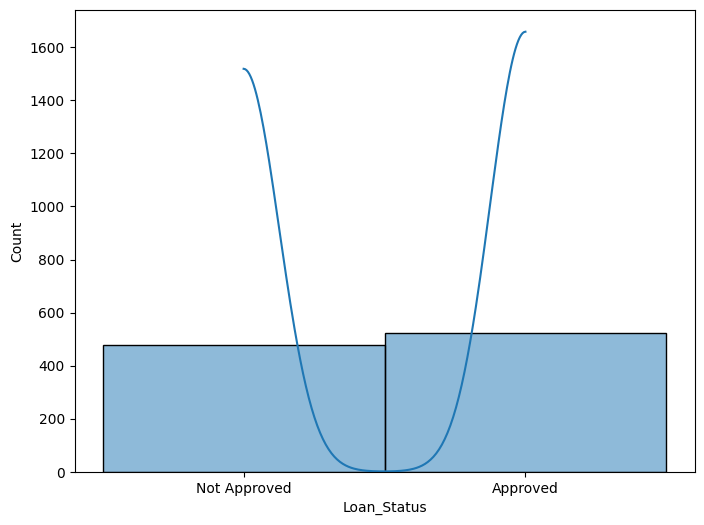

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['Loan_Status'],kde=True)
plt.show()

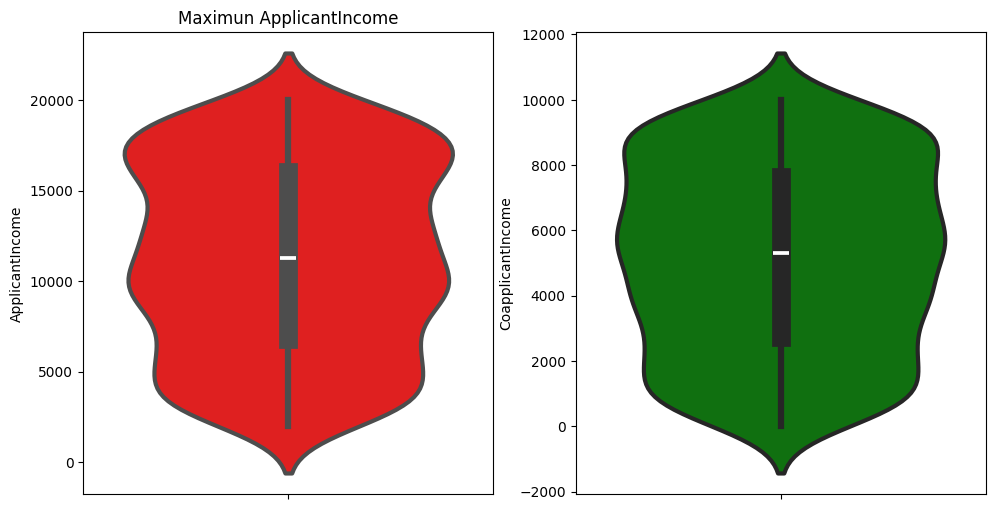

In [42]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Maximun ApplicantIncome')
sns.violinplot(y='ApplicantIncome',data=df,linewidth=3,color='red')
plt.subplot(1,3,2)
plt.subplot(1,3,2)
sns.violinplot(y='CoapplicantIncome',data=df,linewidth=3,color='green')
plt.show()

In [41]:
df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,2196,3326,253,36,1,Male,No,0,Graduate,Yes,Urban,Not Approved
1,15764,8460,252,120,1,Female,Yes,1,Graduate,Yes,Urban,Not Approved


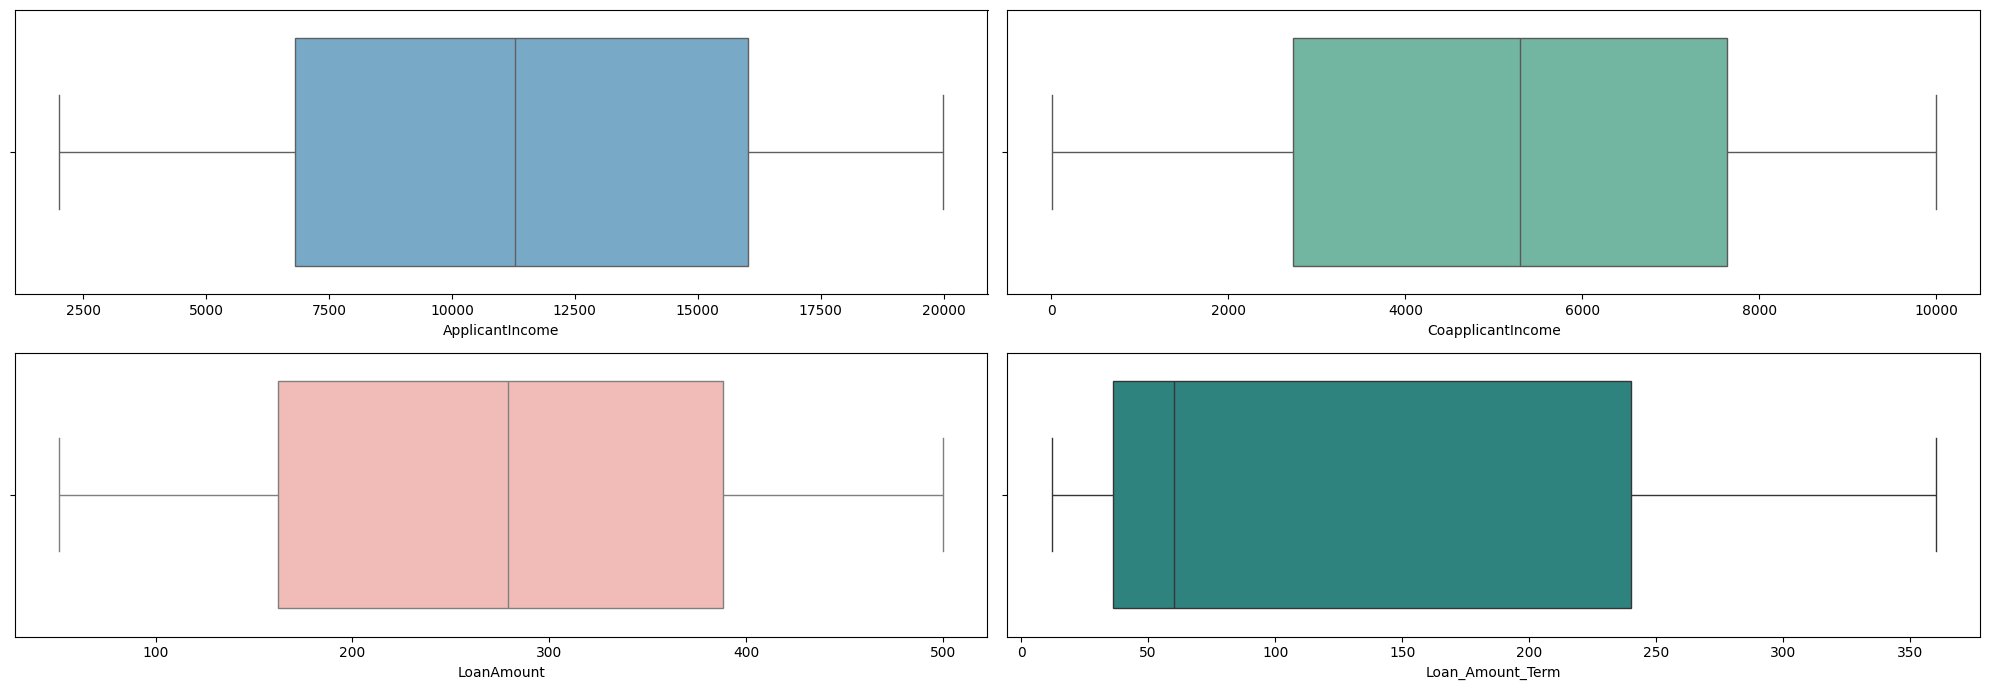

In [46]:
# Create figure
plt.figure(figsize=(20, 7))

# First subplot: ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(x=df['ApplicantIncome'], palette='Blues')

# Second subplot: CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(x=df['CoapplicantIncome'], palette='Set2')

# Third subplot: LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(x=df['LoanAmount'], palette='Pastel1')

# Fourth subplot: Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Loan_Amount_Term'], palette='viridis')

# Show the plots
plt.tight_layout()
plt.show()